In [1]:
import math
import numpy as np
from random import seed
from random import randint
from random import random
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

/Users/dogukan/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [37]:
def generate_random_dataset(size):
    # seed random number generator
    seed(random())
    # generate some integers
    dataset=[]
    for _ in range(size):
        dataset.append([randint(0,20), randint(0,20)])
    return dataset

In [5]:
def visualizegraph(data, label):
    for [x,y] in data:
        plt.plot(x,y, colour((x,y),data, label))

In [10]:
def find_index(k,arr):
    inx=0
    for el in arr:
        if np.array_equal(k,el):
            break
        else:
            inx = inx +1
    return inx

def colour(n,data,label):
    index = find_index(n,data)
    if label[index] ==0:
        return 'bo'
    elif label[index]==1:
        return 'go'
    elif label[index]==2:
        return 'ro'
    else:
        return 'ko'

In [65]:
#generate a random dataset
data = np.array(generate_random_dataset(4))
data = [[0,5],[1,2],[5,3],[5,1]]
print(data)

[[0, 5], [1, 2], [5, 3], [5, 1]]


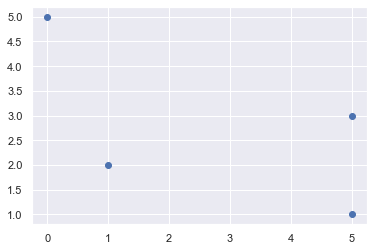

In [66]:
visualizegraph(data, [0,0,0,0])

In [67]:
def gaussian_similarity(x, y):
    sigma=3
    if not np.array_equal(x,y):
        return math.exp(-np.linalg.norm(np.subtract(x,y), 2)**2/(2*sigma**2))
    else:
        return 0

In [68]:
def construct_weightmatrix(data):
    W = pairwise_distances(data, metric=gaussian_similarity)
    return W

In [72]:
def show_similarity_graph(data,W):
    #add edges to graph function
    def add_edge_to_graph(G,e1,e2,w):
        G.add_edge(e1,e2,weight=w) 

    G = nx.Graph()
    points = [(x,y) for [x,y] in data]  # (x,y) points
    edges=[]
    for x in range(len(W)):
        for y in range(len(W[0])):
            edges.append((x,y,W[x][y]))  # (v1,v2, weight)

    for i in range(len(edges)):
        add_edge_to_graph(G,points[edges[i][0]], points[edges[i][1]], round(edges[i][2],3))
    
    
    pos = {point: point for point in points}

    # add axis
    fig, ax = plt.subplots()
    nx.draw(G, pos=pos, node_color='k', ax=ax)
    nx.draw(G, pos=pos, node_size=1200, ax=ax)  # draw nodes and edges
    nx.draw_networkx_labels(G, pos=pos)  # draw node labels/names
    # draw edge weights
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=ax)
    plt.axis("on")
    ax.set_xlim(-1, 6)
    ax.set_ylim(-1,6)
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
    plt.show()

In [78]:
#Construct weight matrix with gaussian similarity function
W = construct_weightmatrix(data)
print('weight matrix:')
print(W)

weight matrix:
[[0.000 0.574 0.200 0.103]
 [0.574 0.000 0.389 0.389]
 [0.200 0.389 0.000 0.801]
 [0.103 0.389 0.801 0.000]]


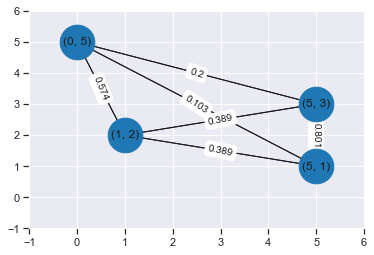

In [79]:
#Visualize the graph
show_similarity_graph(data,W)

In [80]:
# degree matrix
D = np.diag(np.sum(np.array(W), axis=1))
print('degree matrix:')
print(D)

degree matrix:
[[0.876 0.000 0.000 0.000]
 [0.000 1.352 0.000 0.000]
 [0.000 0.000 1.389 0.000]
 [0.000 0.000 0.000 1.292]]


In [81]:
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

laplacian matrix:
[[0.876 -0.574 -0.200 -0.103]
 [-0.574 1.352 -0.389 -0.389]
 [-0.200 -0.389 1.389 -0.801]
 [-0.103 -0.389 -0.801 1.292]]


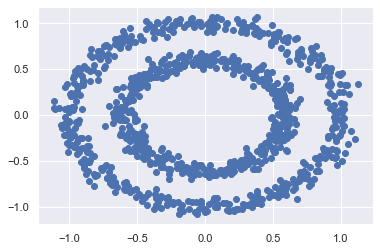

In [82]:
#The unnormalized spectral clustering algorithm
X, clusters = make_circles(n_samples=1000, noise=.05, factor=.6, random_state=0)
plt.scatter(X[:,0], X[:,1])

In [86]:
def gaussian_similarity_sigmasmall(x, y):
    sigma=0.02
    if not np.array_equal(x,y):
        return math.exp(-np.linalg.norm(np.subtract(x,y), 2)**2/(2*sigma**2))
    else:
        return 0
#weight matrix
def construct_weightmatrix(data):
    W = pairwise_distances(data, metric=gaussian_similarity_sigmasmall)
    return W

In [101]:
#construct weight matrix
W2 = construct_weightmatrix(X)
print(W2)

[[0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]]


In [102]:
def construct_degree_and_laplacian(W):
    # degree matrix
    D = np.diag(np.sum(np.array(W), axis=1))
    print('degree matrix:')
    print(D)
    # laplacian matrix
    L = D - W
    print('laplacian matrix:')
    print(L)
    return D,L

In [103]:
#construct degree and laplacian matrices
D2,L2 = construct_degree_and_laplacian(W2)

degree matrix:
[[2.218 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.227 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 1.161 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 0.247 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 1.763 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 3.114]]
laplacian matrix:
[[2.218 0.000 0.000 ... 0.000 -0.000 0.000]
 [0.000 0.227 -0.000 ... 0.000 0.000 0.000]
 [0.000 -0.000 1.161 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 0.247 -0.000 -0.000]
 [-0.000 0.000 0.000 ... -0.000 1.763 0.000]
 [0.000 0.000 0.000 ... -0.000 0.000 3.114]]


In [92]:
def calculate_egvalue_egvector(laplacian):
    e, v = np.linalg.eig(laplacian)
    # eigenvalues
    print('eigenvalues:')
    print(e)
    # eigenvectors
    print('eigenvectors:')
    print(v)
    return e,v

In [94]:
e2,v2 = calculate_egvalue_egvector(L)

eigenvalues:
[6.400 6.260 5.820 5.325 5.447 5.425 4.937 5.060 5.084 4.897 4.923 4.818
 4.741 4.723 4.743 4.556 4.658 4.573 4.538 4.527 4.404 4.488 4.471 4.476
 4.430 4.412 4.487 4.390 4.386 4.314 4.231 4.232 4.191 4.210 4.214 4.204
 4.184 3.811 3.778 4.158 3.777 4.122 3.851 3.904 3.847 4.069 4.053 4.051
 4.063 4.004 4.011 3.988 3.983 3.902 3.928 3.932 4.118 4.116 3.972 3.986
 3.861 3.809 2.973 3.013 3.034 3.799 3.798 3.767 3.751 3.771 3.732 3.180
 3.738 3.094 3.729 3.679 3.653 3.668 3.119 3.729 3.712 3.693 3.695 3.686
 3.243 3.566 3.628 3.631 3.600 3.204 3.695 3.184 3.540 3.589 3.627 3.537
 3.449 3.548 3.584 3.375 3.570 3.555 3.494 3.246 3.354 3.496 3.512 3.520
 3.400 3.295 3.534 3.322 3.269 3.334 3.385 3.336 3.403 3.407 3.525 3.423
 3.260 3.258 3.256 3.421 3.566 3.538 3.324 3.398 3.348 3.407 2.657 2.685
 2.695 2.773 2.774 2.714 2.738 3.224 3.208 3.259 3.243 2.828 3.155 2.893
 3.177 3.164 3.014 2.838 3.164 2.848 3.044 3.006 3.031 3.046 2.970 3.238
 2.909 2.951 2.893 3.060 3.173 2.874 2

In [95]:
#Construct a matrix U containing the first k eigenvectors
def construct_u(k):
    idx = np.argpartition(e, k)
    U=v[:, idx[:k]]
    return U

In [96]:
U2 = construct_u(2)

In [97]:
#Cluster the points of rows of U with k means algorithm into k clusters
def cluster_kmeans(k,U):
    km = KMeans(init='k-means++', n_clusters=k)
    km.fit(U)
    return km.labels_

In [99]:
labels = cluster_kmeans(2,U2)

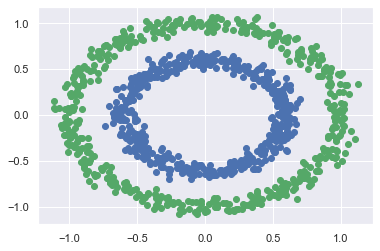

In [100]:
for [x,y] in X:
    plt.plot(x,y, colour((x,y),X,labels))

In [104]:
labels_kmeans = cluster_kmeans(2,X)

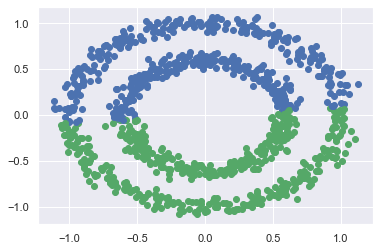

In [105]:
for [x,y] in X:
    plt.plot(x,y, colour((x,y),X,labels_kmeans))